# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [97]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library

df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width[cm]", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [98]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width[cm],label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [100]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width[cm]"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

We will look plot the points using only two of the features

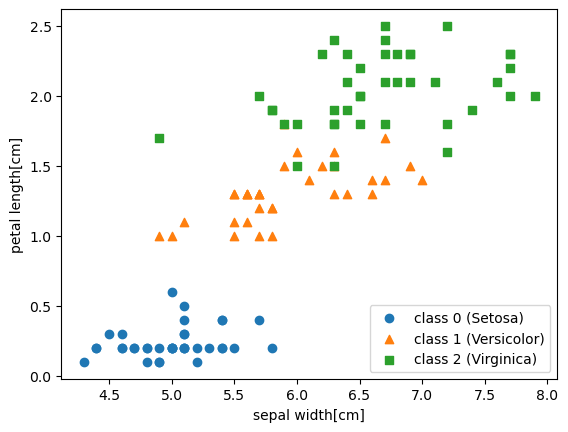

In [172]:
plt.scatter(X_train[y_train == 0, 0],
            X_train[y_train == 0, 1],
            marker='o',
            label='class 0 (Setosa)')

plt.scatter(X_train[y_train == 1, 0],
            X_train[y_train == 1, 1],
            marker='^',
            label='class 1 (Versicolor)')

plt.scatter(X_train[y_train == 2, 0],
            X_train[y_train == 2, 1],
            marker='s',
            label='class 2 (Virginica)')

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()
g=y_train

# Your code goes here

In [102]:
def euclidean_distance(x1, x2):
   k=(x1[0]-x2[0])**2
   l=(x1[1]-x2[1])**2


        
   return  np.sqrt(k+l)
  

In [189]:
def manhatt(x1,x2):
   k=np.abs(x1[0]-x2[0])
   l=np.abs(x1[1]-x2[1])


        
   return  k+l
  


In [117]:
def modee(g):

    a=0
    b=0
    c=0
    
    for i in g :
        if(i==0):
            a=a+1

        if(i==1):
            b=b+1
        if(i==2):
            c=c+1
    

    if(a>=b and a>=c):
        return 0
    elif(b>a and b>=c):
        return 1
    elif(c>a and c>b):
        return 2

In [176]:
def min_index(x,k):
    g=np.array(x)
    min_p= [i for i, x in enumerate(g) if x == k]
    for i in min_p:
        if(y_train[i]==0):
            return i
    for i in min_p:
        if(y_train[i]==1):
            return i
    for i in min_p:
        if(y_train[i]==2):
            return i        
    

In [191]:
def get_neighbors( X_train, y_train, x_test, k, dist_func):
  #### TO-DO #####  
 if(k==1): 
  dista=[]

  for i in x_test:
     dist=[]
     for g in X_train:
       dist.append(dist_func(i,g))
     dista.append(min_index(dist,min(dist)))

  neighbours=[]
  for i in range(len(x_test)):
    neighbours.append(y_train[dista[i]])
    
  return neighbours
 elif(k==3):
     neighbours=[]
     dista=[]
     for i in x_test:
       dist=[]
       ggg=[]
       ppp=[]
       for g in X_train:
         dist.append(dist_func(i,g))

       ppp=dist
       a=min_index(dist,min(dist))
       ggg.append(min_index(dist,min(dist)))
       
       dist[a]=10000000
       a=min_index(dist,min(dist))
       ggg.append(min_index(dist,min(dist)))
       
       dist[a]=112222222
       a=min_index(dist,min(dist))
       ggg.append(min_index(dist,min(dist)))
      
       dist[a]=112222222
       dista.append(ggg)


     for i in range(len(x_test)):
        ll=[] 
        for kop in range(len(dista[i])):
            ll.append(y_train[dista[i][kop]])
          
        neighbours.append(ll)

       
       

     

     return neighbours
 elif(k==5):
   neighbours=[]
   
   dista=[]
   for i in x_test:
     dist=[]
     ggg=[]
     ppp=[]
     for g in X_train:
      dist.append(dist_func(i,g))

     ppp=dist
     a=min_index(dist,min(dist))
     ggg.append(a)
     
     dist[a]=10000000
     a=min_index(dist,min(dist))
     ggg.append(a)
    
     dist[a]=10000000
     a=min_index(dist,min(dist))
     ggg.append(a)
     
     dist[a]=10000000
     a=min_index(dist,min(dist))
     ggg.append(a)
     
     dist[a]=10000000
     a=min_index(dist,min(dist))
     ggg.append(a)
     dista.append(ggg)


   for i in range(len(x_test)):
          ll=[] 
          for kop in range(len(dista[i])):
            ll.append(y_train[dista[i][kop]])
          
          neighbours.append(ll)  
   return neighbours
     
   
 

    

In [194]:
  #### TO-DO ##### 

n=get_neighbors(X_train,y_train,X_test,1,euclidean_distance)
print(n)

#for k=1 

pred=np.array(n)

c=0
print('The misclassified examples for k=1 are:')
for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        print(X_test[i])
        c=c+0

print('The accuracy for k=1 is :',((c/len(y_test)))*100,'%')


######

n=get_neighbors(X_train,y_train,X_test,3,euclidean_distance)
print(n)
pre=[]

#for k=3 
for i in n:
    pre.append(modee(i))
    
pred=np.array(pre)

c=0
print('The misclassified examples for k=3 are:')
for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        print(X_test[i])
        c=c+0

print('The accuracy for k=3 is :',((c/len(y_test)))*100,'%')

############

n=get_neighbors(X_train,y_train,X_test,5,euclidean_distance)
print(n)
pre=[]

#for k=5
for i in n:
    pre.append(modee(i))
    
pred=np.array(pre)

c=0
print('The misclassified examples for k=5 are:')
for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        print(X_test[i])
        c=c+0

print('The accuracy for k=5 is :',((c/len(y_test)))*100,'%')





[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]
The misclassified examples for k=1 are:
[6.1 1.4]
[6.  1.5]
The accuracy for k=1 is : 94.73684210526315 %
[[2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 2, 2], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 2, 1], [1, 1, 1], [1, 1, 2], [1, 2, 1], [0, 0, 0], [2, 1, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 1, 2], [2, 2, 2], [1, 1, 1], [0, 0, 0], [1, 2, 1]]
The misclassified examples for k=3 are:
[6.1 1.4]
The accuracy for k=3 is : 97.36842105263158 %
[[2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [1, 1, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 2, 1, 1], [1, 2, 1, 1, 1], [1, 2, 1, 1, 1], [1, 1, 1, 1, 2], [1, 1, 2, 1, 1], [1, 2, 1, 1, 1], [0, 0, 0

Using Zero R

In [195]:
a=0
b=0
c=0

for i in y_train:
    if(i==0):
        a=a+1
    if(i==1):
        b=b+1
    if(i==2):
        c=c+1

print(a,b,c)
go=[]

for i in range(len(X_test)):
    go.append(2)
    
pred=np.array(go)

c=0

for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        c=c+0

print('The accuracy for Zero R classifier is :',((c/len(y_test)))*100,'%')





   

37 34 41
The accuracy for Zero R classifier is : 23.684210526315788 %


Using a different distance metric Manhattan Distance

In [200]:
  #### TO-DO ##### 
print('On using the manhattan distance metric:')
n=get_neighbors(X_train,y_train,X_test,1,manhatt)
print(n)

#for k=1 

pred=np.array(n)

c=0
print('The misclassified examples for k=1 are:')
for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        print(X_test[i])
        c=c+0

print('The accuracy for k=1 is :',((c/len(y_test)))*100,'%')


######

n=get_neighbors(X_train,y_train,X_test,3,manhatt)
print(n)
pre=[]

#for k=3 
for i in n:
    pre.append(modee(i))
    
pred=np.array(pre)

c=0
print('The misclassified examples for k=3 are:')
for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        print(X_test[i])
        c=c+0

print('The accuracy for k=3 is :',((c/len(y_test)))*100,'%')

############

n=get_neighbors(X_train,y_train,X_test,5,manhatt)
print(n)
pre=[]

#for k=5
for i in n:
    pre.append(modee(i))
    
pred=np.array(pre)

c=0
print('The misclassified examples for k=5 are:')
for i in range(len(y_test)):
    if(y_test[i]==pred[i]):
        c=c+1
    else:
        print(X_test[i])
        c=c+0

print('The accuracy for k=5 is :',((c/len(y_test)))*100,'%')

print('The accuracy for the knn algorithm did not change despite using a different distance metric because eventhough at a minor scale there')
print('may have been some change the overall data spread remains the same and knn algorithm is not easily affected by a different distance metric')





On using the manhattan distance metric:
[2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1]
The misclassified examples for k=1 are:
[6.1 1.4]
[6.  1.5]
The accuracy for k=1 is : 94.73684210526315 %
[[2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 2, 2], [0, 0, 0], [2, 2, 2], [0, 0, 0], [1, 1, 1], [1, 1, 1], [1, 1, 2], [1, 2, 1], [1, 2, 1], [1, 1, 1], [1, 1, 2], [1, 2, 1], [0, 0, 0], [2, 1, 1], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [0, 0, 0], [2, 2, 2], [0, 0, 0], [0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], [2, 2, 2], [1, 1, 1], [0, 0, 0], [2, 1, 2], [2, 2, 2], [1, 1, 1], [0, 0, 0], [1, 2, 1]]
The misclassified examples for k=3 are:
[6.1 1.4]
The accuracy for k=3 is : 97.36842105263158 %
[[2, 2, 2, 2, 2], [1, 1, 1, 1, 1], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [2, 2, 2, 2, 2], [0, 0, 0, 0, 0], [1, 1, 1, 1, 2], [1, 1, 1, 1, 1], [1, 1, 2, 1, 1], [1, 2, 1, 1, 1], [1, 2, 1, 1, 1], [1, 1, 1, 1, 1], [1